In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib.inline
sns.set_style('darkgrid')

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
df=pd.read_csv('SpotifyFeatures.csv')
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [4]:
#information comtains in datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
# Basic statistic details 
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [6]:
# number of rows and columns
df.shape

(232725, 18)

In [7]:
# number of columns pressent in the columns
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [8]:
# check the null values present in the datasets
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

# convert duration from ms to sec

In [9]:
df["duration_sec"]= df["duration_ms"].apply(lambda x:round(x/1000))
df.drop("duration_ms", inplace=True, axis=1)
df['duration_sec'].head()

0     99
1    137
2    170
3    152
4     83
Name: duration_sec, dtype: int64

# Data Visualiozation

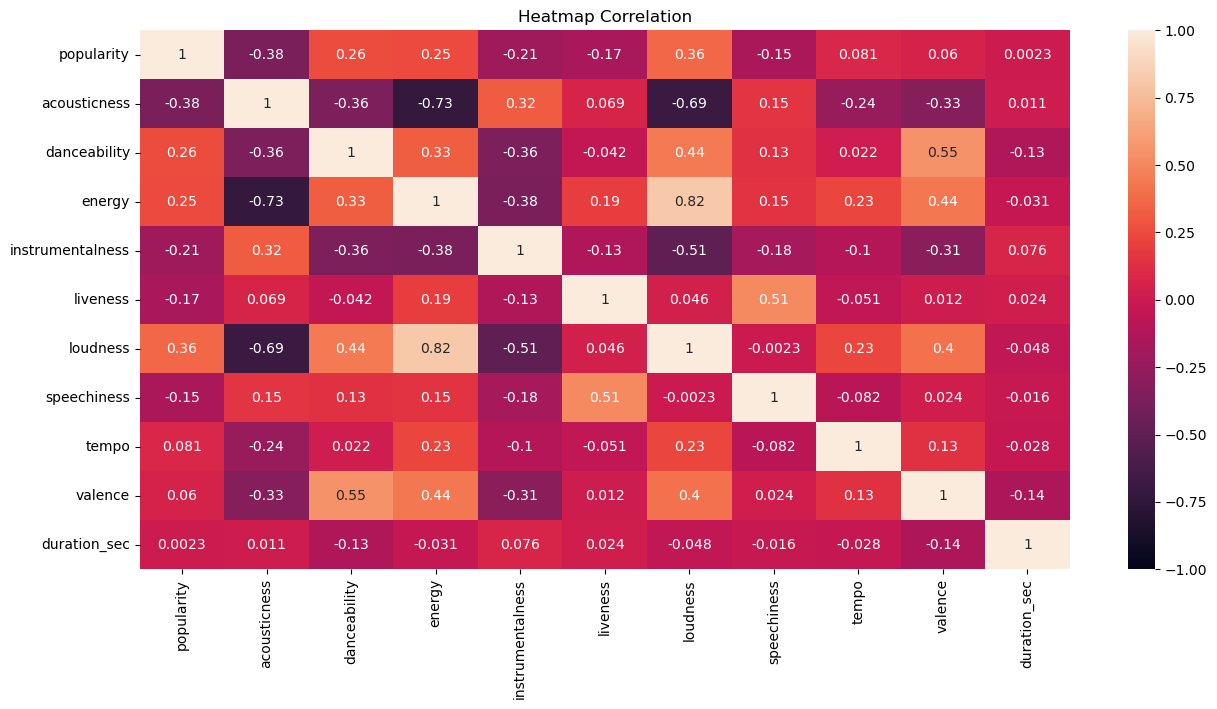

In [10]:
#first we delete the unwanted dataset 
df_corr= df.drop(['key','mode'],axis=1).corr()
plt.figure(figsize=(15,7))
heatmap= sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)
heatmap.set_title('Heatmap Correlation')
plt.show()

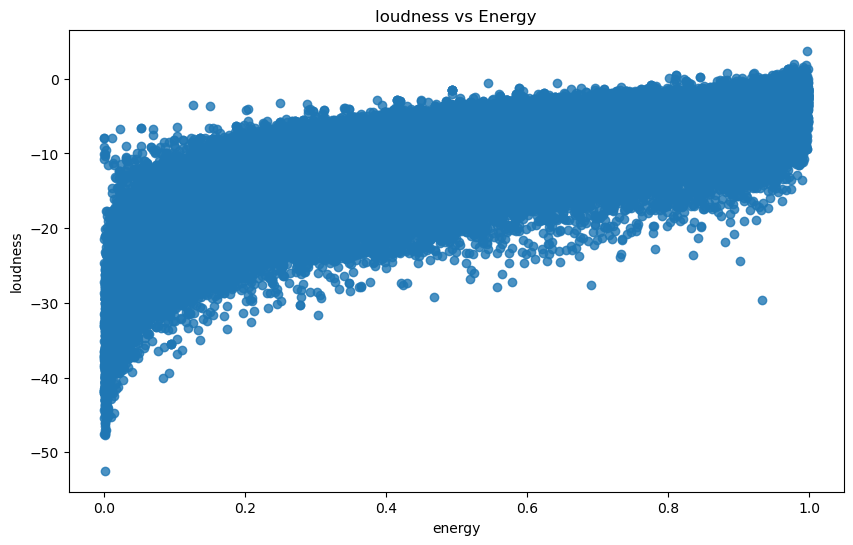

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y="loudness",x="energy").set_title("loudness vs Energy")
plt.show()

In [12]:
df_cols=df[[ 'popularity','acousticness', 'danceability', 'duration_sec', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [13]:
df_copy=df_cols
df_copy.head()

popularity  acousticness  danceability  duration_sec  energy  \
0           0         0.611         0.389            99   0.910   
1           1         0.246         0.590           137   0.737   
2           3         0.952         0.663           170   0.131   
3           0         0.703         0.240           152   0.326   
4           4         0.950         0.331            83   0.225   

   instrumentalness  liveness  loudness  speechiness    tempo time_signature  \
0             0.000    0.3460    -1.828       0.0525  166.969            4/4   
1             0.000    0.1510    -5.559       0.0868  174.003            4/4   
2             0.000    0.1030   -13.879       0.0362   99.488            5/4   
3             0.000    0.0985   -12.178       0.0395  171.758            4/4   
4             0.123    0.2020   -21.150       0.0456  140.576            4/4   

   valence  
0    0.814  
1    0.816  
2    0.368  
3    0.227  
4    0.390

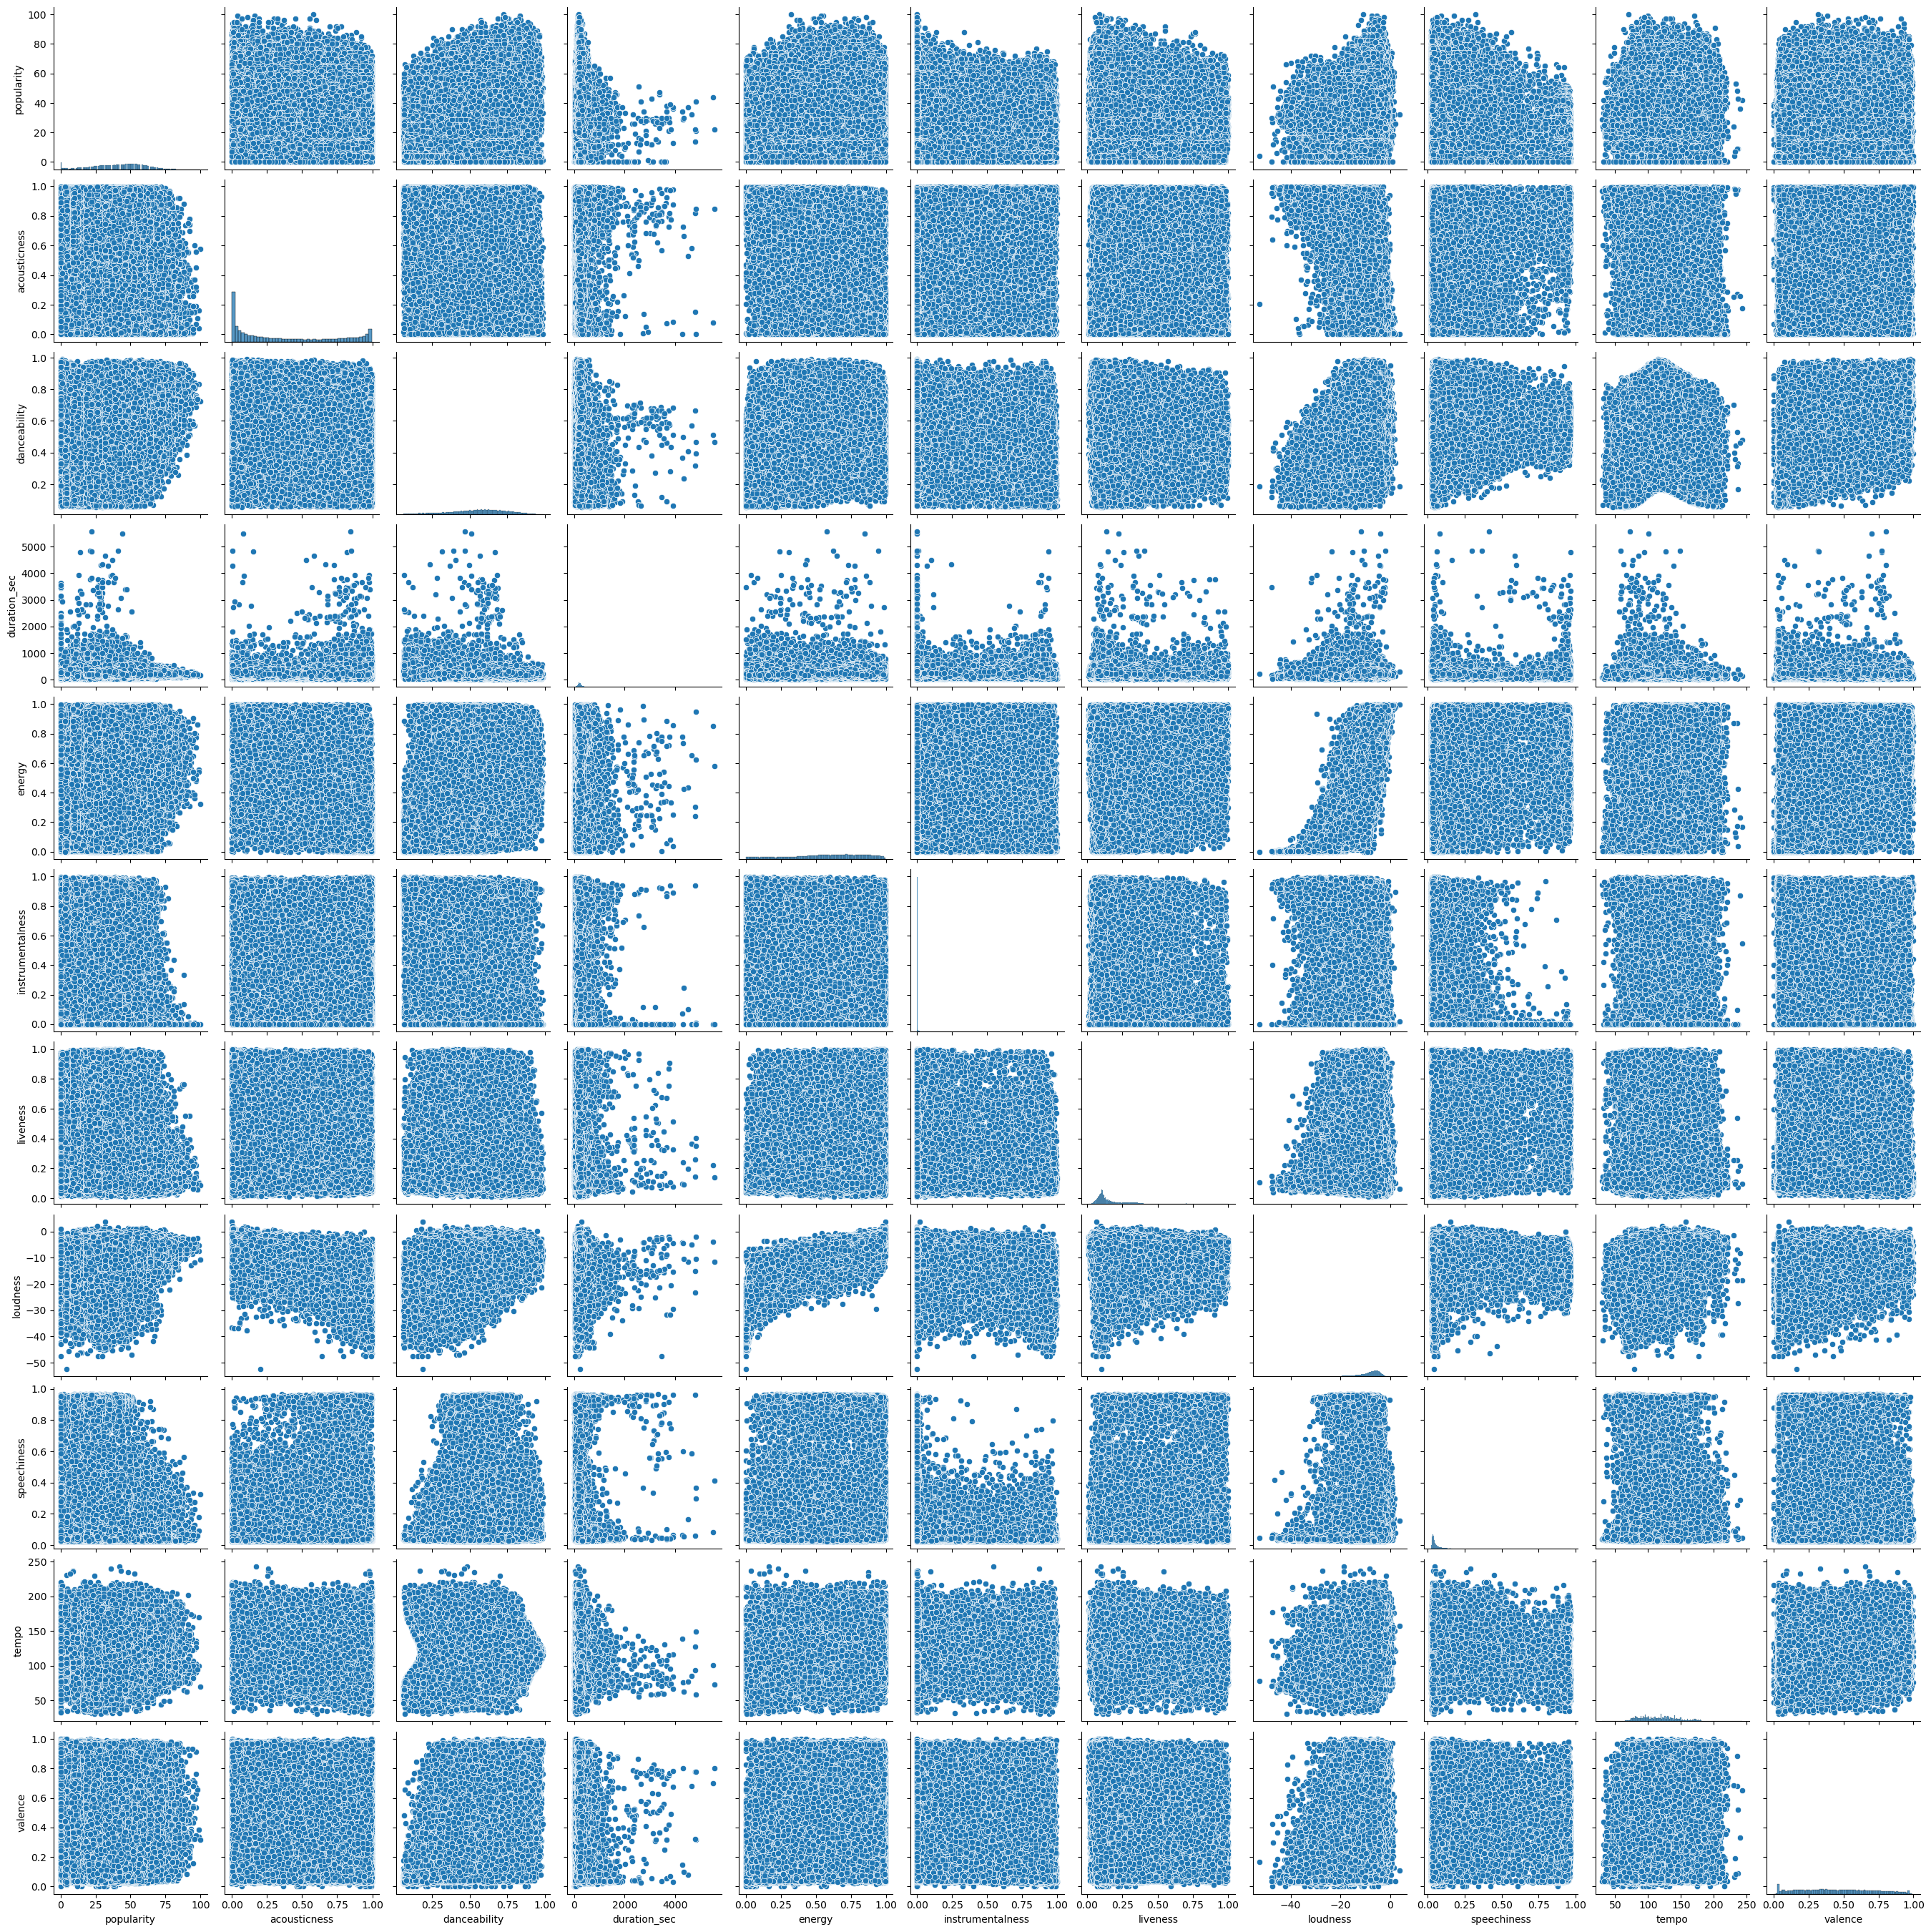

In [14]:
sns.pairplot(df_copy)

<AxesSubplot:>

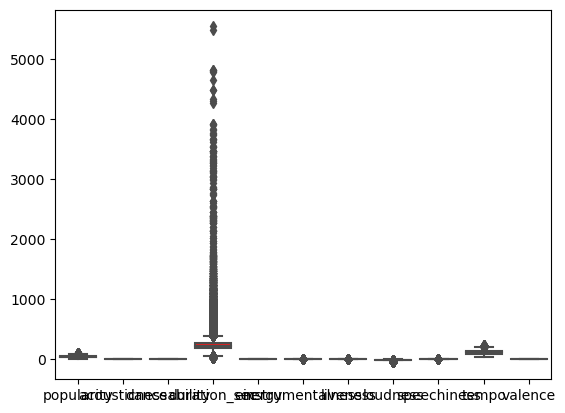

In [15]:
# boxplot is used to find outliers
sns.boxplot(data=df_copy, color='Red')

# Top 5 popular Artist

In [16]:
 
top_5_artists= df.groupby('artist_name').count().sort_values('track_name',ascending=False)['track_name'][:5]
top_5_artists

artist_name
Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
Name: track_name, dtype: int64

<AxesSubplot:xlabel='artist_name'>

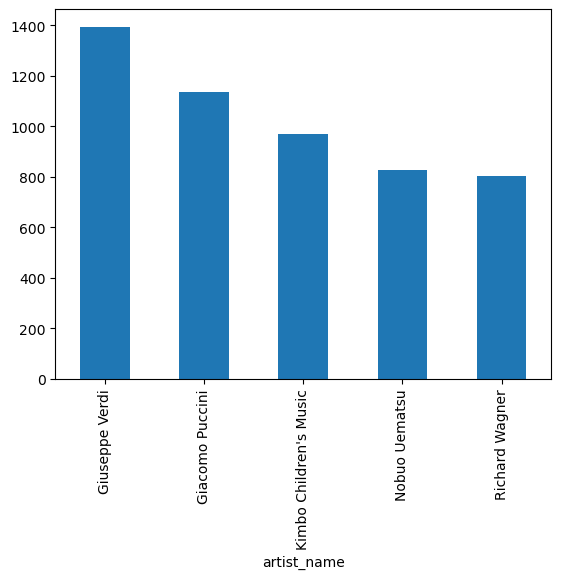

In [17]:
top_5_artists.plot.bar()


# Top 5 popular song

In [18]:
df_pop=df.sort_values('popularity', ascending=False)
df_pop.head()

genre    artist_name                                track_name  \
9027    Dance  Ariana Grande                                   7 rings   
107804    Pop  Ariana Grande                                   7 rings   
86951     Rap    Post Malone                                      Wow.   
107803    Pop    Post Malone                                      Wow.   
107802    Pop  Ariana Grande  break up with your girlfriend, i'm bored   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
107804  14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107803  6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   

        energy  instrumentalness key  liveness  loudness   mode  speechiness  \
9027     0.321          0.000000  C#    0.0884   -10.744  Minor       0.3230   
107804   0.321          0.000000  C#    0.0884   -10.744  Minor       0.3230   
86951    0.539          0.000002   B    0.1010    -7.399  Minor       0.1780   
107803   0.539          0.000002   B    0.1010    -7.399  Minor       0.1780   
107802   0.554          0.000000   F    0.1060    -5.290  Minor       0.0917   

          tempo time_signature  valence  duration_sec  
9027     70.142            4/4    0.319           179  
107804   70.142            4/4    0.319           179  
86951    99.947            4/4    0.385           150  
107803   99.947            4/4    0.385           150  
107802  169.999            4/4    0.335           190

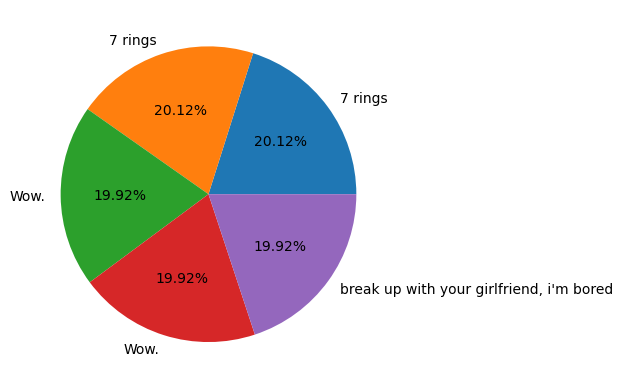

In [19]:
plt.pie(x='popularity',autopct='%1.2f%%', data=df_pop.head(), labels='track_name')
plt.show()

# Top 5 loudest track

In [20]:
top_loud_tracks=df[['loudness','track_name']].sort_values("loudness", ascending=True)
top_loud_tracks.head()

loudness                                         track_name
218717   -52.457                                       Call to Wake
218540   -47.669                                             Neroli
126046   -47.599  La Damnation de Faust, Op. 24, H. 111: Pt. II,...
203063   -47.499                               Limes - Instrumental
126602   -47.432  Variations On A Theme Of Chopin, Op.22: Variat...

# Top 5 Instrumentalness songs

In [21]:
top_inst_songs=df[['track_name',"artist_name","instrumentalness"]].sort_values('instrumentalness', ascending=False)
top_inst_songs.head()

track_name  \
199660  Opening Titles - From "Jurassic Park" Soundtrack   
203562                                 I Know What I Saw   
31144                                Kingdom of Burmecia   
76749       My Bonnie Lies Over the Ocean - Instrumental   
34781                                     スリルのテーマ 〜サスペンス   

                       artist_name  instrumentalness  
199660               John Williams             0.999  
203562  Kyle Dixon & Michael Stein             0.998  
31144                Nobuo Uematsu             0.997  
76749       Children Songs Company             0.997  
34781            Capcom Sound Team             0.996

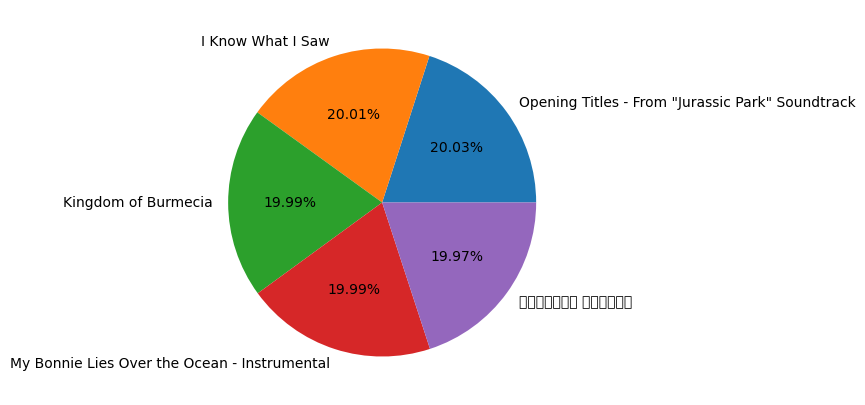

In [22]:
plt.figure(figsize=(10,5))
plt.pie(x='instrumentalness', data=top_inst_songs.head(),autopct="%1.2f%%", labels='track_name')
plt.show()

# Top 5 Artist with Danceability

In [23]:
top_dance_songs=df[['danceability','track_name','artist_name']].sort_values('danceability',ascending=False)
top_dance_songs.head()

danceability            track_name  artist_name
75396          0.989           Fuzzy Wuzzy  Juice Music
75762          0.987  I've Been Everywhere  Juice Music
26911          0.987              Sol Clap      Quantic
178675         0.987              Sol Clap      Quantic
90205          0.986               Go Girl      Pitbull

# Visualization

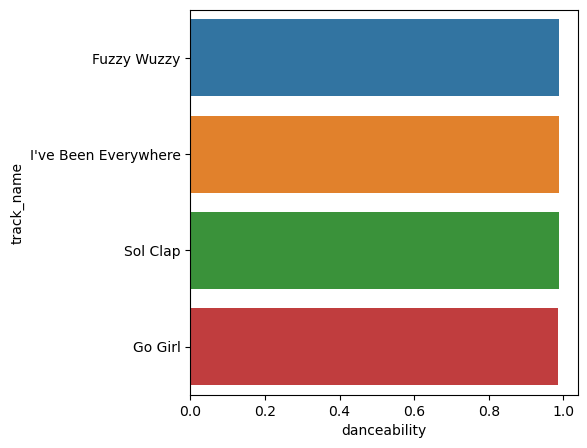

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(x='danceability',y='track_name',data=top_dance_songs.head())
plt.show()

# Top 5 Geners in Popularity

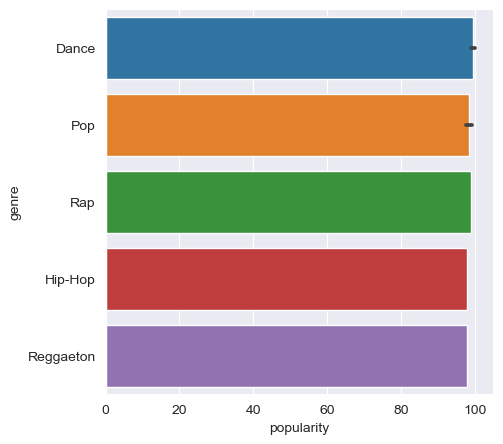

In [29]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(5,5))
famous=df.sort_values('popularity',ascending=False)
sns.barplot(x='popularity',y='genre',data=famous.head(10))
plt.show()

# Top 5 songs which are energetic




















































In [30]:
top_energetic=df[['energy','track_name','artist_name']].sort_values('energy',ascending=False)
top_energetic.head()

energy             track_name      artist_name
157871   0.999                In Hell   Choking Victim
24427    0.999                 Wicked      Bear Grillz
186488   0.999  Undertaker, Undertake  Swingin' Utters
177575   0.999                  ObZen        Meshuggah
21942    0.999               No Limit      2 Unlimited

# Duration of songs

Text(0, 0.5, 'Genres')

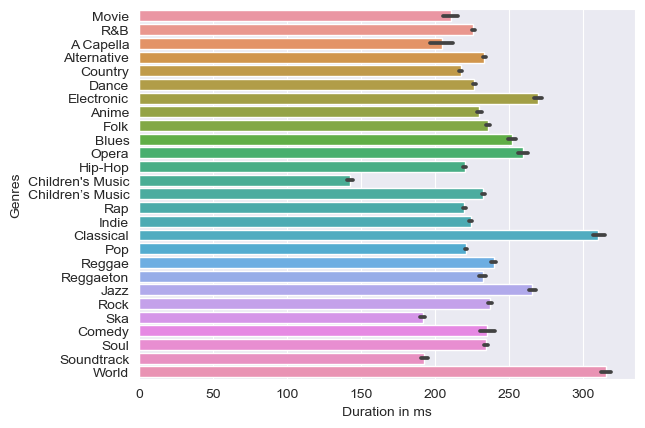

In [31]:
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y='genre',x='duration_sec',data=df)
plt.xlabel('Duration in ms')
plt.ylabel('Genres')